In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  more_itertools import unique_everseen
import math
import re
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [3]:
na_values = ['n/a', 'N/A', 'NaN', 'nan', 'NAN', '-1', ' ', '', '--', '-']
df_cities = pd.read_csv('data/cities.csv', na_values=na_values)
df_providers = pd.read_csv('data/providers.csv', na_values=na_values)
df_stations = pd.read_csv('data/stations.csv', na_values=na_values)
df_ticket_data = pd.read_csv('data/ticket_data.csv', na_values=na_values)

# Data Exploration
## Displaying datasets and infos
### 1. Cities

In [4]:
display(df_cities.head())
print(f'\nCities data\nShape : {df_cities.shape}\nInfos :')
tab_cities_info = pd.DataFrame(df_cities.dtypes).T.rename(index={0:'column type'})
tab_cities_info = tab_cities_info.append(pd.DataFrame(df_cities.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_cities_info = tab_cities_info.append(pd.DataFrame(df_cities.isnull().sum()/df_cities.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_cities_info)

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN



Cities data
Shape : (8040, 6)
Infos :


,id,local_name,unique_name,latitude,longitude,population
column type,int64,object,object,float64,float64,float64
null values (nb),0,0,2,0,0,7671
null values (%),0.0,0.0,0.024876,0.0,0.0,95.410448


### 2. Providers

In [5]:
display(df_providers.head())
df_providers['provider_id']= pd.to_numeric(df_providers['provider_id'],errors = 'coerce', downcast='unsigned')
print(f'\nProviders data\nShape : {df_providers.shape}\nInfos : ')
tab_providers_info = pd.DataFrame(df_providers.dtypes).T.rename(index={0:'column type'})
tab_providers_info = tab_providers_info.append(pd.DataFrame(df_providers.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_providers_info = tab_providers_info.append(pd.DataFrame(df_providers.isnull().sum()/df_providers.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_providers_info)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus



Providers data
Shape : (227, 10)
Infos : 


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
column type,int64,int64,float64,object,object,object,object,object,object,object
null values (nb),0,0,17,0,0,3,3,3,3,0
null values (%),0.0,0.0,7.488987,0.0,0.0,1.321586,1.321586,1.321586,1.321586,0.0


### 3. Stations

In [6]:
display(df_stations.head())
print(f'\nStations data\nShape : {df_stations.shape}\nInfos :')
tab_stations_info = pd.DataFrame(df_stations.dtypes).T.rename(index={0:'column type'})
tab_stations_info = tab_stations_info.append(pd.DataFrame(df_stations.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_stations_info = tab_stations_info.append(pd.DataFrame(df_stations.isnull().sum()/df_stations.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_stations_info)

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737



Stations data
Shape : (11035, 4)
Infos :


,id,unique_name,latitude,longitude
column type,int64,object,float64,float64
null values (nb),0,0,0,0
null values (%),0.0,0.0,0.0,0.0


### 4. Ticket

In [7]:
display(df_ticket_data.head())
print(f'\nTicket data:\nShape : {df_ticket_data.shape}\nInfos :')
tab_ticket_data_info = pd.DataFrame(df_ticket_data.dtypes).T.rename(index={0:'column type'})
tab_ticket_data_info = tab_ticket_data_info.append(pd.DataFrame(df_ticket_data.isnull().sum()).T.rename({0:'null values (nb)'}))
tab_ticket_data_info = tab_ticket_data_info.append(pd.DataFrame(df_ticket_data.isnull().sum()/df_ticket_data.shape[0]*100).T.rename({0:'null values (%)'}))
display(tab_ticket_data_info)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542



Ticket data:
Shape : (74168, 12)
Infos :


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
column type,int64,int64,float64,float64,object,object,int64,object,object,object,int64,int64
null values (nb),0,0,41441,41441,0,0,0,0,41441,41441,0,0
null values (%),0.0,0.0,55.874501,55.874501,0.0,0.0,0.0,0.0,55.874501,55.874501,0.0,0.0


<p><b>departure_ts</b> and <b>arrival_ts</b> or of type <em>object</em> and they should be of type <em>date</em></p>

In [8]:
df_ticket_data['departure_ts'] = pd.to_datetime(df_ticket_data['departure_ts'])
df_ticket_data['arrival_ts'] = pd.to_datetime(df_ticket_data['arrival_ts'])

## Features' statistics
### 1. Cities

In [9]:
display(df_cities.describe())
display(df_cities.describe(include='object'))

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


,local_name,unique_name
count,8040,8038
unique,8040,8038
top,"Ужгород, Закарпатська область, Україна",la-baule
freq,1,1


### 2. Providers

In [10]:
display(df_providers.describe())
display(df_providers.describe(include='object'))

,id,company_id,provider_id
count,227.000000,227.000000,210.000000
mean,790.656388,9.343612,361.857143
std,2251.823950,3.036065,169.250864
min,9.000000,1.000000,0.000000
25%,66.500000,9.000000,227.500000
50%,127.000000,9.000000,392.000000
75%,183.500000,9.000000,496.500000
max,8389.000000,40.000000,611.000000


,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
count,227,227,224,224,224,224,227
unique,227,225,2,2,2,2,4
top,starqistnaExpress,Intercités,False,False,False,False,bus
freq,1,2,220,221,212,223,214


In [11]:
df_providers['transport_type'].unique()

array(['bus', 'car', 'train', 'carpooling'], dtype=object)

In [12]:
df_providers[df_providers['transport_type'] == 'car']

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
5,14,6,NaN,driivme,DriiveMe,False,False,False,False,car


In [13]:
df_providers.at[5, 'transport_type'] = 'carpooling'

### 3. Stations

In [14]:
display(df_stations.describe())
display(df_stations.describe(include='object'))

,id,latitude,longitude
count,11035.000000,11035.000000,11035.000000
mean,5518.026914,47.526678,7.580807
std,3185.719813,3.953972,63.655681
min,1.000000,-22.355790,-22.625538
25%,2759.500000,44.896447,1.358655
50%,5518.000000,47.759670,5.824010
75%,8276.500000,50.349956,12.166133
max,11036.000000,64.137571,6645.000000


,unique_name
count,11035
unique,11035
top,Baia Mare Bhf
freq,1


<p> Investigating the stations features statistics I have noticed that the max value of the <b>longitude</b> feauture was out of the <em>[-180;180] range </em></p>

In [15]:
display(df_stations[df_stations['longitude'] > 180])

,id,unique_name,latitude,longitude
161,162,Combloux - Office du tourisme,45.894811,6645.0


<p>Using the name of the station I found out the correct <b>longitude</b>, <em>"6.6448019"</em>, value and replaced the one in the data frame</p>

In [16]:
df_stations.iloc[161,df_stations.columns.get_loc('longitude')] = 6.6448019

### 4. Ticket

In [17]:
display(df_ticket_data.describe())
display(df_ticket_data.describe(include='object'))

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


,search_ts,middle_stations,other_companies
count,74168,32727,32727
unique,13266,1207,90
top,2017-10-09 15:19:25.522+00,"{279,279}",{8376}
freq,29,1373,9483


# Data Cleaning and Feature engineering

<p>Creating a new column with the time duration</p>

In [18]:
df_ticket_data['duration_h_r'] = df_ticket_data['arrival_ts'] - df_ticket_data['departure_ts']
#duration_h_r stands for duration human readable
df_ticket_data['duration'] = df_ticket_data['duration_h_r'].apply(lambda x: x.days * 24 + x.seconds / 3600)

<p>defining new empty columns and assigning <em>new values</em> to the null values in the <b>other_companies</b> and <b>middle_stations</b> columns </p>

In [19]:
df_ticket_data['middle_stations_list'] = None
df_ticket_data['all_stations_latlong_list'] = None
df_ticket_data['other_companies'] = df_ticket_data['other_companies'].fillna('noc') #noc -> No Other Company(s)
df_ticket_data['middle_stations'] = df_ticket_data['middle_stations'].fillna('nms') #nms -> No Middle Station(s)

<p>Creating function that will help us clean some wrong data for example lists interpreted as strings</p>

In [20]:
def convert_str_to_list(x):
    '''
        Converting a string written in the following format {1,2,3} to a list equivalent
    '''
    if x == 'noc' or x == 'nms':
        pass
    else:
        x = re.sub(r'[{}]','', x)
        return list(map(int, x.split(',')))

def get_latlong(df1, df2, index, col):
    '''
        Fetch Latitude and longitude values of current element
    '''
    lat = df1[df1['id'] == df2.loc[index, col]].values[0][2]
    long = df1[df1['id'] == df2.loc[index, col]].values[0][3]
    return [lat, long]

def get_latlong_elem(df, elem):
    '''
        Fetch Latitude and longitude values of current element
    '''
    lat = df[df['id'] == elem]['latitude'].values[0]
    long = df[df['id'] == elem]['longitude'].values[0]
    return [lat, long]  

def get_transport(x):
    '''
        Returns type of transportation
    '''
    return df_providers[df_providers['id'] == x]['transport_type'].values[0]

def get_company(x):
    '''
        Returns the name of the company
    '''
    return df_providers[df_providers['id'] == x]['fullname'].values[0]

def remove_duplicate_mid_stations(x):
    '''
        Removes duplicates found in lists
    '''
    return list(unique_everseen(x))

In [21]:
df_ticket_data['transport_type'] = df_ticket_data['company'].apply(lambda x : get_transport(x))
df_ticket_data['company_name'] = df_ticket_data['company'].apply(lambda x : get_company(x))
df_ticket_data['other_companies_list'] = df_ticket_data['other_companies'].apply(lambda x: convert_str_to_list(x))

<p>We have 3 Transport types for each of them I used specific columns : <p>
<ul>
    <li>
        Carpooling:
        <ul>
            <li> starting point : <em> o_city </em> </li>
            <li> destination point : <em> d_city </em></li>
        </ul>
    </li>
    <li>
        Bus and Train:
        <ul>
            <li> starting point : <em> o_station </em> </li>
            <li> stations in between : <em> middle_stations </em>
            <li> destination point : <em> d_station </em></li>
        </ul>
    </li>
</ul>

In [22]:
for index, row in df_ticket_data.iterrows():
    try:
        latlong = []
        if df_ticket_data.loc[index, 'transport_type'] == 'carpooling':
            latlong.append(get_latlong_elem(df_cities, df_ticket_data.loc[index, 'o_city']))
            latlong.append(get_latlong_elem(df_cities, df_ticket_data.loc[index, 'd_city']))
        else :
            latlong.append(get_latlong(df_stations, df_ticket_data, index, 'o_station'))
            x = df_ticket_data.loc[index, 'middle_stations']
            lst = convert_str_to_list(x)
            
            df_ticket_data.at[index,'middle_stations_list'] = remove_duplicate_mid_stations(lst)
            
            for elem in lst:
                latlong.append(get_latlong_elem(df_stations, elem))   
            latlong.append(get_latlong(df_stations, df_ticket_data, index, 'd_station'))
        df_ticket_data.at[index,'all_stations_latlong_list'] = latlong
    except:
        continue

<p> Once we fixed and fetched the list equivalent from the following columns <em>middle_stations</em> and <em>other_companies</em>, we now drop them </p>

In [23]:
df_ticket_data = df_ticket_data.drop(axis=1, columns=['middle_stations', 'other_companies'])

In [24]:
df_ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,o_city,d_city,duration_h_r,duration,middle_stations_list,all_stations_latlong_list,transport_type,company_name,other_companies_list
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,611,542,0 days 06:10:00,6.166667,None,"[[47.907018, 1.90627], [43.604452, 3.918318]]",carpooling,Blablacar,None
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,611,542,0 days 17:50:00,17.833333,"[149, 418]","[[47.896911, 1.854277], [47.06382, 2.36815], [...",bus,Ouibus,[13]
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,611,542,1 days 07:57:00,31.950000,"[798, 6794, 6246]","[[47.92674, 1.90674], [46.337443, 2.597606], [...",train,Intercités,"[8377, 8376]"
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,611,542,0 days 21:35:00,21.583333,"[798, 6794, 6246]","[[47.92674, 1.90674], [46.337443, 2.597606], [...",train,Intercités,"[8377, 8376]"
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,611,542,0 days 21:46:00,21.766667,[5983],"[[47.92674, 1.90674], [43.20023, 2.76962], [43...",train,Intercités de Nuit,[8380]


<h3>Calculating distance using latitude and longitude values</h3>

<p>The calculated distance with the function below wouldn't be the optimal one, instead it would be the <b>minimal</b> it is calculated on the basis of being a straight line between two geographical points.</p>
<br>
<p>In order to properly calculate it we need access to more data related to roads, traffic and railroads Google Roads API would be really helpful for this task.</p>

In [25]:
def distance(o_lat, o_lon, d_lat, d_lon):
    '''
        Calculate distance between two geographical points
    '''
    p = np.pi / 180
    a = 0.5 - np.cos((d_lat - o_lat) * p)/2 + \
    np.cos(o_lat * p) * np.cos(d_lat * p) * \
    (1 - np.cos((d_lon - o_lon) * p)) / 2
    return 12742 * np.arcsin(np.sqrt(a)) 

In [26]:
def get_total_distance(dist_list):
    '''
        Get the sum of distance in a list of geographical points
    '''
    try:
        total_dist = 0
        for i in range(len(dist_list)-1):
            total_dist += distance(dist_list[i][0], dist_list[i][1], dist_list[i+1][0], dist_list[i+1][1])
        return total_dist
    except:
        pass

In [27]:
df_ticket_data['distance_total'] = df_ticket_data['all_stations_latlong_list'].apply(lambda x : get_total_distance(x))

In [28]:
df_ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,o_city,d_city,duration_h_r,duration,middle_stations_list,all_stations_latlong_list,transport_type,company_name,other_companies_list,distance_total
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,611,542,0 days 06:10:00,6.166667,None,"[[47.907018, 1.90627], [43.604452, 3.918318]]",carpooling,Blablacar,None,503.197167
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,611,542,0 days 17:50:00,17.833333,"[149, 418]","[[47.896911, 1.854277], [47.06382, 2.36815], [...",bus,Ouibus,[13],508.560137
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,611,542,1 days 07:57:00,31.950000,"[798, 6794, 6246]","[[47.92674, 1.90674], [46.337443, 2.597606], [...",train,Intercités,"[8377, 8376]",1085.277123
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,611,542,0 days 21:35:00,21.583333,"[798, 6794, 6246]","[[47.92674, 1.90674], [46.337443, 2.597606], [...",train,Intercités,"[8377, 8376]",1085.277123
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,611,542,0 days 21:46:00,21.766667,[5983],"[[47.92674, 1.90674], [43.20023, 2.76962], [43...",train,Intercités de Nuit,[8380],630.222814


# Statistics and visualizations

<h3> Useful information about Global prices, distances and durations </h3>

In [29]:
print('Minimum global price : ' + str(min(df_ticket_data['price_in_cents'])/100) + ' €')
print('Maximim global price : ' + str(max(df_ticket_data['price_in_cents'])/100) + ' €')
print('Mean global price : {0:.2f} €'.format(np.mean(df_ticket_data['price_in_cents'])/100))

Minimum global price : 3.0 €
Maximim global price : 385.5 €
Mean global price : 43.83 €


In [30]:
print('Minimum global duration : {}'.format(min(df_ticket_data['duration_h_r'])))
print('Maximim global duration : {}'.format(max(df_ticket_data['duration_h_r'])))
print('Mean global duration : {}'.format(np.mean(df_ticket_data['duration_h_r'])))

Minimum global duration : 0 days 00:20:00
Maximim global duration : 20 days 12:51:00
Mean global duration : 0 days 07:04:37.247600043


In [31]:
print('Minimum global distance : {0:.2f} Km'.format(min(df_ticket_data['distance_total'])))
print('Maximum global distance : {0:.2f} Km'.format(max(df_ticket_data['distance_total'])))
print('Mean global distance : {0:.2f} Km'.format(np.mean(df_ticket_data['distance_total'])))

Minimum global distance : 16.60 Km
Maximum global distance : 1896.73 Km
Mean global distance : 381.37 Km


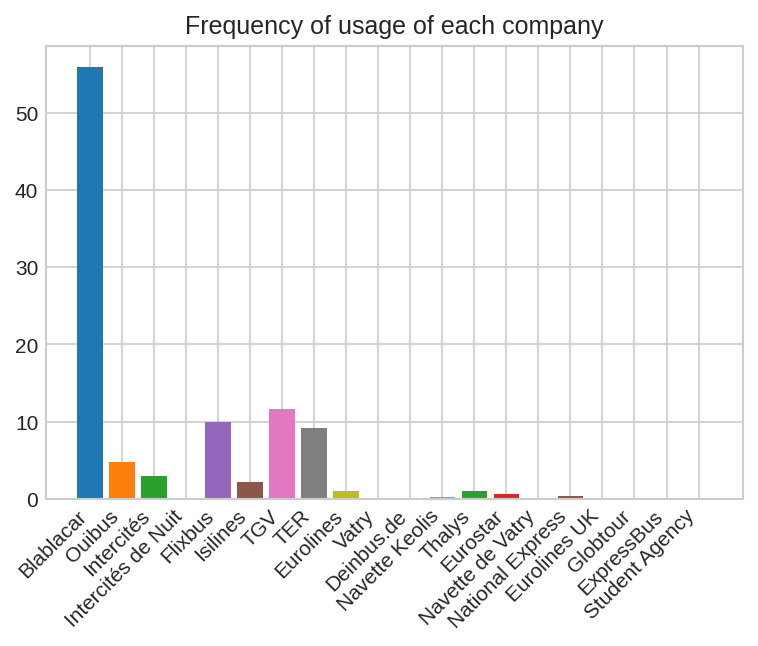

In [32]:
company_list = df_ticket_data['company'].unique()
df_company_usage_frequency = pd.DataFrame(data = None, columns=['company_name', 'frequency'])
plt.title('Frequency of usage of each company')
for i in range(len(company_list)):
    name = df_providers[df_providers['id'] == company_list[i]]['fullname'].values[0]
    freq = (df_ticket_data[df_ticket_data['company'] == company_list[i]].count()[0]/df_ticket_data.shape[0])*100
    plt.bar(name, freq)
    df_company_usage_frequency = df_company_usage_frequency.append({'company_name':name,'frequency':freq}, ignore_index=True)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [33]:
print('Least used services')
min(df_company_usage_frequency['frequency'])
df_company_usage_frequency[df_company_usage_frequency['frequency'] == min(df_company_usage_frequency['frequency'])]

Least used services


,company_name,frequency
17,Globtour,0.001348
18,ExpressBus,0.001348


<h3> Grouping dataset by trip duration and transport type </h3>

In [34]:
comparison_dict={'0->200':{'train':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'bus':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'carpooling':{'average_price':0,'average_duration_h_r':0,'average_duration':0}},
                 '201->800':{'train':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'bus':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'carpooling':{'average_price':0,'average_duration_h_r':0,'average_duration':0}},
                 '801->2000':{'train':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'bus':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'carpooling':{'average_price':0,'average_duration_h_r':0,'average_duration':0}},
                 '2000+':{'train':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'bus':{'average_price':0,'average_duration_h_r':0,'average_duration':0},
                          'carpooling':{'average_price':0,'average_duration_h_r':0,'average_duration':0}}}

In [35]:
for t in ['train','bus','carpooling']:
    comparison_dict['0->200'][t]['average_price']=np.mean(df_ticket_data[df_ticket_data['distance_total']<201][df_ticket_data['transport_type']==t].price_in_cents)
    comparison_dict['0->200'][t]['average_duration_h_r']=np.mean(df_ticket_data[df_ticket_data['distance_total']<201][df_ticket_data['transport_type']==t]['duration_h_r'])
    comparison_dict['0->200'][t]['average_duration']=np.mean(df_ticket_data[df_ticket_data['distance_total']<201][df_ticket_data['transport_type']==t]['duration'])
for t in ['train','bus','carpooling']:
    comparison_dict['201->800'][t]['average_price']=np.mean(df_ticket_data[df_ticket_data['distance_total']<801][df_ticket_data['distance_total']>=201][df_ticket_data['transport_type']==t].price_in_cents)
    comparison_dict['201->800'][t]['average_duration_h_r']=np.mean(df_ticket_data[df_ticket_data['distance_total']<801][df_ticket_data['distance_total']>=201][df_ticket_data['transport_type']==t]['duration_h_r'])
    comparison_dict['201->800'][t]['average_duration']=np.mean(df_ticket_data[df_ticket_data['distance_total']<801][df_ticket_data['distance_total']>=201][df_ticket_data['transport_type']==t]['duration'])
for t in ['train','bus','carpooling']:
    comparison_dict['801->2000'][t]['average_price']=np.mean(df_ticket_data[df_ticket_data['distance_total']<2001][df_ticket_data['distance_total']>=801][df_ticket_data['transport_type']==t].price_in_cents)
    comparison_dict['801->2000'][t]['average_duration_h_r']=np.mean(df_ticket_data[df_ticket_data['distance_total']<2001][df_ticket_data['distance_total']>=801][df_ticket_data['transport_type']==t]['duration_h_r'])
    comparison_dict['801->2000'][t]['average_duration']=np.mean(df_ticket_data[df_ticket_data['distance_total']<2001][df_ticket_data['distance_total']>=801][df_ticket_data['transport_type']==t]['duration'])
for t in ['train','bus','carpooling']:
    comparison_dict['2000+'][t]['average_price']=np.mean(df_ticket_data[df_ticket_data['distance_total']>=2001][df_ticket_data['transport_type']==t].price_in_cents)
    comparison_dict['2000+'][t]['average_duration_h_r']=np.mean(df_ticket_data[df_ticket_data['distance_total']>=2001][df_ticket_data['transport_type']==t]['duration_h_r'])
    comparison_dict['2000+'][t]['average_duration']=np.mean(df_ticket_data[df_ticket_data['distance_total']>=2001][df_ticket_data['transport_type']==t]['duration'])

In [36]:
df_comparison = pd.DataFrame.from_dict({(i,j): comparison_dict[i][j] for i in comparison_dict.keys() 
                                        for j in comparison_dict[i].keys()},
                                           orient='index')

In [37]:
display(df_comparison)

average_price      average_duration_h_r  \
0->200    train         2974.727100 0 days 04:17:53.051732320   
          bus           1984.604730 0 days 07:24:20.067567567   
          carpooling    1194.670862 0 days 01:58:38.915779283   
201->800  train         8841.928785 0 days 07:28:08.111748565   
          bus           3395.982814 0 days 14:48:46.705231388   
          carpooling    3231.199948 0 days 04:46:50.514079049   
801->2000 train        16495.127226 0 days 12:43:35.725190839   
          bus           6818.708138 1 days 03:06:02.253521126   
          carpooling    8626.545455 0 days 13:06:00.839160839   
2000+     train                 NaN                       NaT   
          bus                   NaN                       NaT   
          carpooling            NaN                       NaT   

                      average_duration  
0->200    train               4.298070  
          bus                 7.405574  
          carpooling          1.977477  
201->800  train               7.468920  
          bus                14.812974  
          carpooling          4.780698  
801->2000 train              12.726590  
          bus                27.100626  
          carpooling         13.100233  
2000+     train                    NaN  
          bus                      NaN  
          carpooling               NaN

<p>Creating a new feature to have a look into minimum, maximum and mean of the price per km</p>

In [38]:
for index, row in df_ticket_data.iterrows():
    df_ticket_data.at[index, 'price_per_km'] = df_ticket_data.loc[index, 'price_in_cents'] / df_ticket_data.loc[index, 'distance_total']

In [39]:
print('Minimum global price : {0:.2f} cents'.format(min(df_ticket_data['price_per_km'])))
print('Maximim global price : {0:.2f} cents'.format(max(df_ticket_data['price_per_km'])))
print('Mean global price : {0:.2f} cents'.format(np.mean(df_ticket_data['price_per_km'])))

Minimum global price : 2.15 cents
Maximim global price : 129.34 cents
Mean global price : 11.44 cents


In [40]:
for index, row in df_ticket_data.iterrows():
    time = df_ticket_data.loc[index, 'departure_ts'].hour
    if time in [21, 22, 23, 0, 1, 2, 3, 4, 5, 6]:
        df_ticket_data.at[index, 'day/night'] = 'night'
    else:
        df_ticket_data.at[index, 'day/night'] = 'day'

<p>We now extract each transport_type data in their own respective dataset</p>

In [41]:
df_carpool = df_ticket_data[df_ticket_data['transport_type'] == 'carpooling'].copy()
df_train = df_ticket_data[df_ticket_data['transport_type'] == 'train'].copy()
df_bus = df_ticket_data[df_ticket_data['transport_type'] == 'bus'].copy()

In [42]:
def price_plot(value):
    if value == 'Price':
        plt.title('Price comparaison between transports in euros')
        plt.ylabel('€')
        plt.bar('minimum carpool', min(df_carpool['price_in_cents'])/100)
        plt.bar('minimum bus', min(df_bus['price_in_cents'])/100)
        plt.bar('minimum train', min(df_train['price_in_cents'])/100)
        plt.bar(' ',0)
        plt.bar('mean carpool', np.mean(df_carpool['price_in_cents'])/100)
        plt.bar('mean bus', np.mean(df_bus['price_in_cents'])/100)
        plt.bar('mean train', np.mean(df_train['price_in_cents'])/100)
        plt.bar('  ',0)
        plt.bar('maximum carpool', max(df_carpool['price_in_cents'])/100)
        plt.bar('maximum bus', max(df_bus['price_in_cents'])/100)
        plt.bar('maximum train', max(df_train['price_in_cents'])/100)    
    if value == 'Time':
        plt.title('Time comparaison between transports in hours')
        plt.ylabel('hours')
        plt.bar('minimum carpool', min(df_carpool['duration']))
        plt.bar('minimum bus', min(df_bus['duration']))
        plt.bar('minimum train', min(df_train['duration']))
        plt.bar(' ',0)
        plt.bar('mean carpool', np.mean(df_carpool['duration']))
        plt.bar('mean bus', np.mean(df_bus['duration']))
        plt.bar('mean train', np.mean(df_train['duration']))
        plt.bar('  ',0)
        plt.bar('maximum carpool', max(df_carpool['duration']))
        plt.bar('maximum bus', max(df_bus['duration']))
        plt.bar('maximum train', max(df_train['duration']))
    if value == 'Distance':
        plt.title('Distance comparaison between transports in KM')
        plt.ylabel('KM')
        plt.bar('minimum carpool', min(df_carpool['distance_total']))
        plt.bar('minimum bus', min(df_bus['distance_total']))
        plt.bar('minimum train', min(df_train['distance_total']))
        plt.bar(' ',0)
        plt.bar('mean carpool', np.mean(df_carpool['distance_total']))
        plt.bar('mean bus', np.mean(df_bus['distance_total']))
        plt.bar('mean train', np.mean(df_train['distance_total']))
        plt.bar('  ',0)
        plt.bar('maximum carpool', max(df_carpool['distance_total']))
        plt.bar('maximum bus', max(df_bus['distance_total']))
        plt.bar('maximum train', max(df_train['distance_total']))
    plt.xticks(rotation=45, ha='right')
value = ['Price', 'Time', 'Distance']
interact(price_plot, value=value)
plt.show()

interactive(children=(Dropdown(description='value', options=('Price', 'Time', 'Distance'), value='Price'), Out…

In [43]:
print('Prix minimum carpool: ' + str(min(df_carpool['price_in_cents'])/100) + ' €')
print('Prix maximim carpool: ' + str(max(df_carpool['price_in_cents'])/100) + ' €')
print('Prix moyen carpool: {0:.2f} €'.format(np.mean(df_carpool['price_in_cents'])/100))
print()
print('Prix minimum train: ' + str(min(df_train['price_in_cents'])/100) + ' €')
print('Prix maximim train: ' + str(max(df_train['price_in_cents'])/100) + ' €')
print('Prix moyen train: {0:.2f} €'.format(np.mean(df_train['price_in_cents'])/100))
print()
print('Prix minimum bus: ' + str(min(df_bus['price_in_cents'])/100) + ' €')
print('Prix maximim bus: ' + str(max(df_bus['price_in_cents'])/100) + ' €')
print('Prix moyen bus: {0:.2f} €'.format(np.mean(df_bus['price_in_cents'])/100))

Prix minimum carpool: 3.0 €
Prix maximim carpool: 161.5 €
Prix moyen carpool: 27.42 €

Prix minimum train: 4.9 €
Prix maximim train: 385.5 €
Prix moyen train: 85.07 €

Prix minimum bus: 8.5 €
Prix maximim bus: 229.0 €
Prix moyen bus: 36.52 €


In [44]:
print('Durée minimale carpool : {}'.format(min(df_carpool['duration_h_r'])))
print('Durée maximale carpool : {}'.format(max(df_carpool['duration_h_r'])))
print('Durée moyenne carpool : {}'.format(np.mean(df_carpool['duration_h_r'])))
print()
print('Durée minimale train : {}'.format(min(df_train['duration_h_r'])))
print('Durée maximale train : {}'.format(max(df_train['duration_h_r'])))
print('Durée moyenne train : {}'.format(np.mean(df_train['duration_h_r'])))
print()
print('Durée minimale bus : {}'.format(min(df_bus['duration_h_r'])))
print('Durée maximale bus : {}'.format(max(df_bus['duration_h_r'])))
print('Durée moyenne bus : {}'.format(np.mean(df_bus['duration_h_r'])))

Durée minimale carpool : 0 days 00:20:00
Durée maximale carpool : 1 days 05:10:00
Durée moyenne carpool : 0 days 04:06:38.330156125

Durée minimale train : 0 days 00:39:00
Durée maximale train : 2 days 00:27:00
Durée moyenne train : 0 days 07:20:03.435997675

Durée minimale bus : 0 days 01:05:00
Durée maximale bus : 20 days 12:51:00
Durée moyenne bus : 0 days 15:37:59.769531816


In [45]:
print('Distance minimale carpool : {0:.2f} Km'.format(min(df_carpool['distance_total'])))
print('Distance maximale carpool : {0:.2f} Km'.format(max(df_carpool['distance_total'])))
print('Distance moyenne carpool : {0:.2f} Km'.format(np.mean(df_carpool['distance_total'])))
print()
print('Distance minimale train : {0:.2f} Km'.format(min(df_train['distance_total'])))
print('Distance maximale train : {0:.2f} Km'.format(max(df_train['distance_total'])))
print('Distance moyenne train : {0:.2f} Km'.format(np.mean(df_train['distance_total'])))
print()
print('Distance minimale bus : {0:.2f} Km'.format(min(df_bus['distance_total'])))
print('Distance maximale bus : {0:.2f} Km'.format(max(df_bus['distance_total'])))
print('Distance moyenne bus : {0:.2f} Km'.format(np.mean(df_bus['distance_total'])))

Distance minimale carpool : 18.91 Km
Distance maximale carpool : 1754.30 Km
Distance moyenne carpool : 306.68 Km

Distance minimale train : 16.60 Km
Distance maximale train : 1314.19 Km
Distance moyenne train : 441.38 Km

Distance minimale bus : 36.88 Km
Distance maximale bus : 1896.73 Km
Distance moyenne bus : 523.39 Km


<h3>Difference between prices during the night and day</h3>

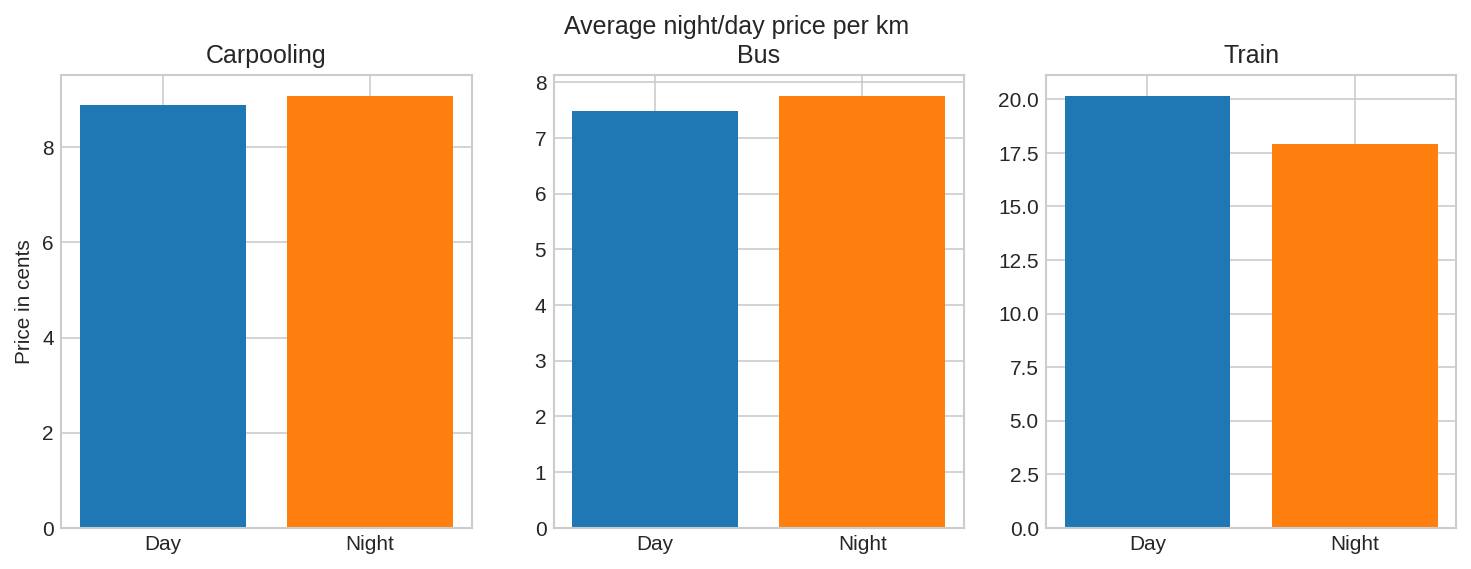

In [46]:
plt.figure(figsize=(12,4))
plt.suptitle('Average night/day price per km')
plt.subplot(131)
plt.title("Carpooling")
plt.ylabel("Price in cents")
plt.bar('Day',np.mean(df_carpool[df_carpool['day/night'] == 'day']['price_per_km']))
plt.bar('Night',np.mean(df_carpool[df_carpool['day/night'] == 'night']['price_per_km']))

plt.subplot(132)
plt.title("Bus")
plt.bar('Day',np.mean(df_bus[df_bus['day/night'] == 'day']['price_per_km']))
plt.bar('Night',np.mean(df_bus[df_bus['day/night'] == 'night']['price_per_km']))

plt.subplot(133)
plt.title("Train")
plt.bar('Day',np.mean(df_train[df_train['day/night'] == 'day']['price_per_km']))
plt.bar('Night',np.mean(df_train[df_train['day/night'] == 'night']['price_per_km']))
plt.show()

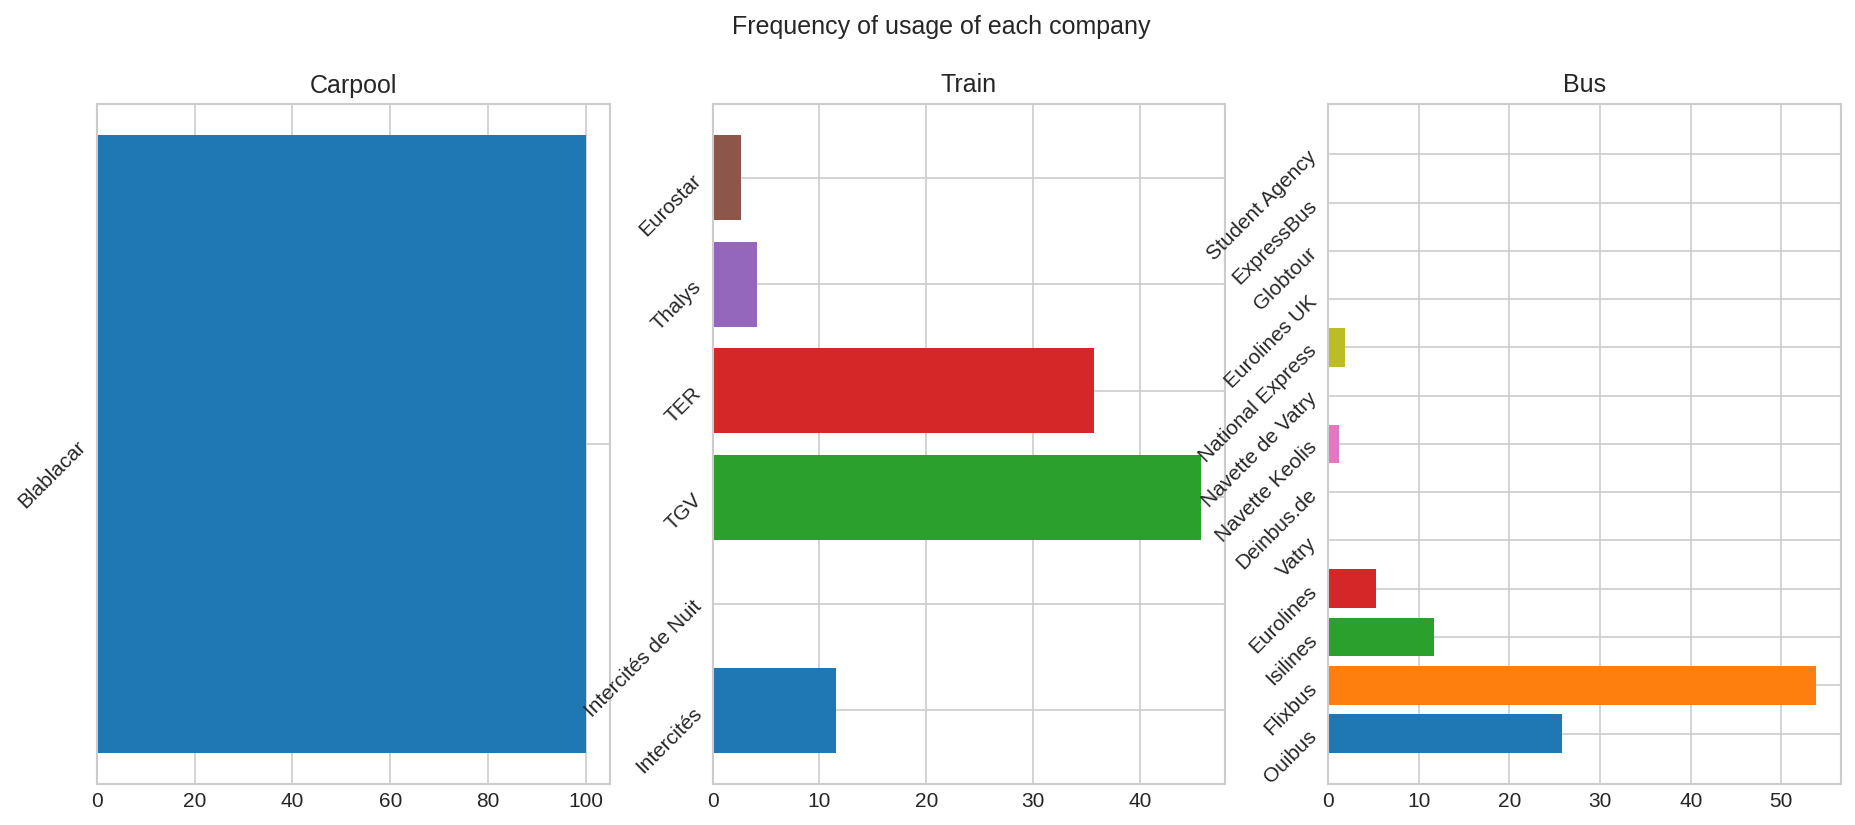

In [47]:
plt.figure(figsize=(15,6))
company_list_carpool = df_carpool['company'].unique()
company_list_bus = df_bus['company'].unique()
company_list_train = df_train['company'].unique()
df_company_carpool_usage_frequency = pd.DataFrame(data = None, columns=['company_name', 'frequency'])
df_company_bus_usage_frequency = pd.DataFrame(data = None, columns=['company_name', 'frequency'])
df_company_train_usage_frequency = pd.DataFrame(data = None, columns=['company_name', 'frequency'])
plt.suptitle('Frequency of usage of each company')
plt.subplot(131)
plt.yticks(rotation=45)
plt.title('Carpool')
for i in range(len(company_list_carpool)):
    name = df_providers[df_providers['id'] == company_list_carpool[i]]['fullname'].values[0]
    freq = (df_carpool[df_carpool['company'] == company_list_carpool[i]].count()[0]/df_carpool.shape[0])*100
    plt.barh(name, freq)
    df_company_carpool_usage_frequency = df_company_usage_frequency.append({'company_name':name,'frequency':freq}, ignore_index=True)

plt.subplot(132)
plt.yticks(rotation=45)
plt.title('Train')
for i in range(len(company_list_train)):
    name = df_providers[df_providers['id'] == company_list_train[i]]['fullname'].values[0]
    freq = (df_train[df_train['company'] == company_list_train[i]].count()[0]/df_train.shape[0])*100
    plt.barh(name, freq)
    df_company_train_usage_frequency = df_company_train_usage_frequency.append({'company_name':name,'frequency':freq}, ignore_index=True)

plt.subplot(133)
plt.yticks(rotation=45)
plt.title('Bus')
for i in range(len(company_list_bus)):
    name = df_providers[df_providers['id'] == company_list_bus[i]]['fullname'].values[0]
    freq = (df_bus[df_bus['company'] == company_list_bus[i]].count()[0]/df_bus.shape[0])*100
    plt.barh(name, freq)
    df_company_bus_usage_frequency = df_company_bus_usage_frequency.append({'company_name':name,'frequency':freq}, ignore_index=True)

plt.show()

# Predicting prices

In [48]:
# Price ~ hour, distance, service
features = ['distance_total','day/night','transport_type']
X = df_ticket_data[features].copy()
y = df_ticket_data['price_in_cents'].copy()

In [49]:
X = pd.get_dummies(X, columns=['day/night','transport_type'])

In [50]:
X = X.values
y = y.values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
randomforest_model = Pipeline((
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor()),
    ))
linear_model = Pipeline((
        ("scaler", StandardScaler()),
        ("model", LinearRegression()),
    ))

In [53]:
randomforest_model.fit(X_train,y_train)
linear_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [54]:
print('Random forest : '+str(randomforest_model.score(X_test, y_test)))
print('Linear regression : '+str(linear_model.score(X_test, y_test)))

Random forest : 0.9087901195391443
Linear regression : 0.674207356746084
